In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import LancasterStemmer, WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import re
import unicodedata
import nltk
import json
import inflect
import matplotlib.pyplot as plt

import json
# load json into python, assign to 'data'
with open('your_posts_1.json') as file:
    data = json.load(file)
print(type(data))     # a list
print(type(data[0]))  # first object in the list: a dictionary
print(len(data))

<class 'list'>
<class 'dict'>
346


In [ ]:
# create empty list
empty_lst = []
# multiple nested loops to store all post in empty list
for dct in data:
    for k, v in dct.items():
        if k == 'data':
            if len(v) > 0:
                for k_i, v_i in v[0].items():  
                    if k_i == 'post':
                        empty_lst.append(v_i)
print("This is the empty list: ", empty_lst)
print("\nLength of list: ", len(empty_lst))
for i in empty_lst:
  print(i)

This is the empty list:  ['Jaise hi main bhaag milkha bhaag dekhne gaya milkha bhaag gaya', 'Happy teej everyone', 'Lonely', 'Happy Raksha bandhan', 'Ravan made by rahul and his team', 'Merry christmas', 'Happy new year friends', 'Students Classification by Age\nClassic examples for students of different age groups:\n1st to 3rd class: Hey! I studied everything for exam.\n4th to 6th class: Hey! That question was very hard so I leave only that question.\n7th to 10th class: Hey! Read only important questions.\n11th class: I think 4 chapters are enough to get pass.\n12th class: Kal exam kaun sa hai yaar?\nAnd in college: Abey kaminon, bata toh dete aaj exam hai, main toh pen bhi nahi laya.\n\nBe the 1st one to like this..', 'Happy Holi to all my friends', 'Not feeling gud kings punjab lost', "Your talents don't have to be perfect to use them.\nIf only the best bird sang, the forests would be silent . . . .", 'Happy TEEJ to all my frendz!!!!!!', 'HAPPY INDEPENDENCE DAY', 'Hathi ghoda palki-

In [ ]:
nltk.download('punkt')
nested_sent_token = [nltk.sent_tokenize(lst) for lst in empty_lst]
# flatten list, len: 3241
flat_sent_token = [item for sublist in nested_sent_token for item in sublist]
print("Flatten sentence token: ", len(flat_sent_token))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Flatten sentence token:  107


In [ ]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode(
            'ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# To LowerCase
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove Punctuation
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Replace Numbers with Textual Representations
def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

# Remove Stopwords
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

# Combine all functions into Normalize() function
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words
    
nltk.download('stopwords')
sents = normalize(flat_sent_token)
print("Length of sentences list: ", len(sents))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Length of sentences list:  83


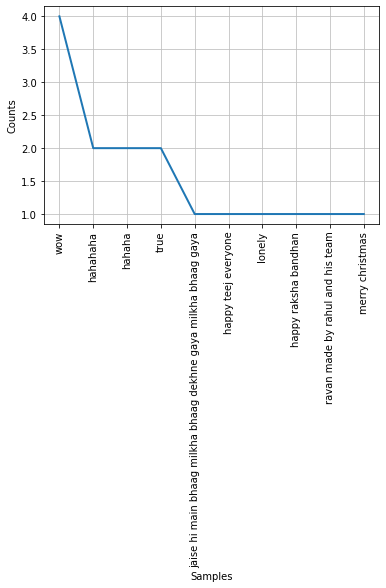

In [ ]:
from nltk.probability import FreqDist
# Find frequency of sentence
fdist_sent = FreqDist(sents)
fdist_sent.most_common(10)   
# Plot
fdist_sent.plot(10)

In [ ]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
sentiment = []
sentiment2 = []
for sent in sents:
    sent1 = sent
    sent_scores = sid.polarity_scores(sent1)
    for x, y in sent_scores.items():
        sentiment2.append((x, y))
    sentiment.append((sent1, sent_scores))
    # print(sentiment)
# sentiment
cols = ['sentence', 'numbers']
result = pd.DataFrame(sentiment, columns=cols)
print("First five rows of results: ", result.head())
# sentiment2
cols2 = ['label', 'values']
result2 = pd.DataFrame(sentiment2, columns=cols2)
print("First five rows of results2: ", result2.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
First five rows of results:                                              sentence                                            numbers
0  jaise hi main bhaag milkha bhaag dekhne gaya m...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1                                happy teej everyone  {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'comp...
2                                             lonely  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
3                               happy raksha bandhan  {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'comp...
4                   ravan made by rahul and his team  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
First five rows of results2:        label  values
0       neg     0.0
1       neu     1.0
2       pos     0.0
3  compound     0.0
4       neg     0.0
